In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv('Data/data_house.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  float64
 4   bedrooms       21613 non-null  int64  
 5   bathrooms      21613 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

In [4]:
dataset.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
dataset.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
data = dataset[['bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'price']]

In [7]:
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price
0,3,1.00,1180,5650,1.0,0,0,3,1180,0,1955,0,221900.0
1,3,2.25,2570,7242,2.0,0,0,3,2170,400,1951,1991,538000.0
2,2,1.00,770,10000,1.0,0,0,3,770,0,1933,0,180000.0
3,4,3.00,1960,5000,1.0,0,0,5,1050,910,1965,0,604000.0
4,3,2.00,1680,8080,1.0,0,0,3,1680,0,1987,0,510000.0


<AxesSubplot:>

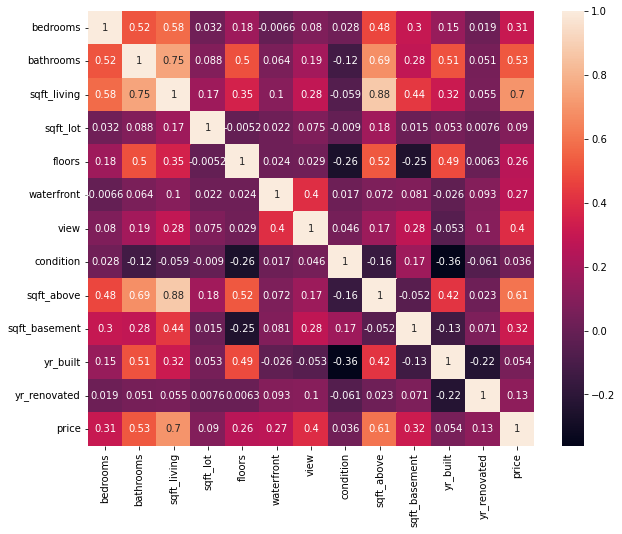

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True)

In [9]:
x = data.iloc[:, :-1]
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3,1.00,1180,5650,1.0,0,0,3,1180,0,1955,0
1,3,2.25,2570,7242,2.0,0,0,3,2170,400,1951,1991
2,2,1.00,770,10000,1.0,0,0,3,770,0,1933,0
3,4,3.00,1960,5000,1.0,0,0,5,1050,910,1965,0
4,3,2.00,1680,8080,1.0,0,0,3,1680,0,1987,0


In [10]:
y = data.iloc[:, -1]
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [11]:
sc = StandardScaler()
sc.fit(x)
# sc.transform(x) 
x = pd.DataFrame(sc.transform(x), columns=x.columns)
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.734708,-0.658681,-0.544898,-0.210128
1,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,0.460841,0.245141,-0.681079,4.746678
2,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.229834,-0.658681,-1.293892,-0.210128
3,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.891699,1.397515,-0.204446,-0.210128
4,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,-0.130895,-0.658681,0.544548,-0.210128


In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [13]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [14]:
(lr.score(X_test, y_test))*100

60.38622387625233

In [15]:
lr.coef_

array([-4.98365752e+04,  4.98483939e+04, -2.63007130e+17, -1.51448228e+04,
        2.47300701e+04,  4.28644201e+04,  4.81156898e+04,  9.96204773e+03,
        2.37134292e+17,  1.26736943e+17, -8.48740124e+04,  5.92332181e+03])

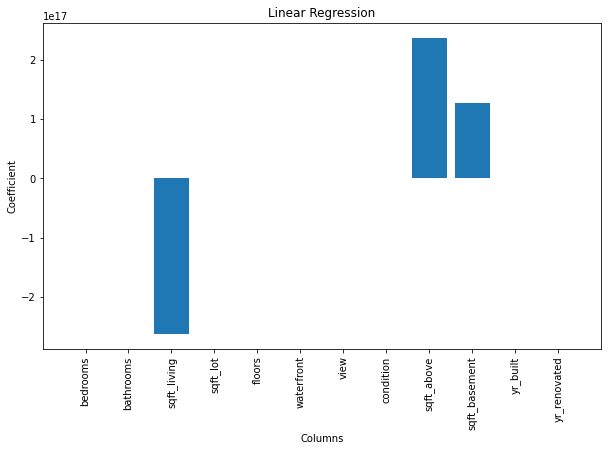

In [46]:
plt.figure(figsize=(10, 6))
plt.bar(x.columns, lr.coef_)
plt.xticks(rotation=90, fontsize=10)
plt.title('Linear Regression')
plt.xlabel('Columns')
plt.ylabel('Coefficient')
plt.show()

In [44]:
la = Lasso(alpha=0.7)
la.fit(X_train, y_train)
la.score(X_test, y_test)*100

C:\Users\ACER\anaconda3\envs\booksenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32253773483184.625, tolerance: 210410096861.09866
  positive)


60.390033806969214

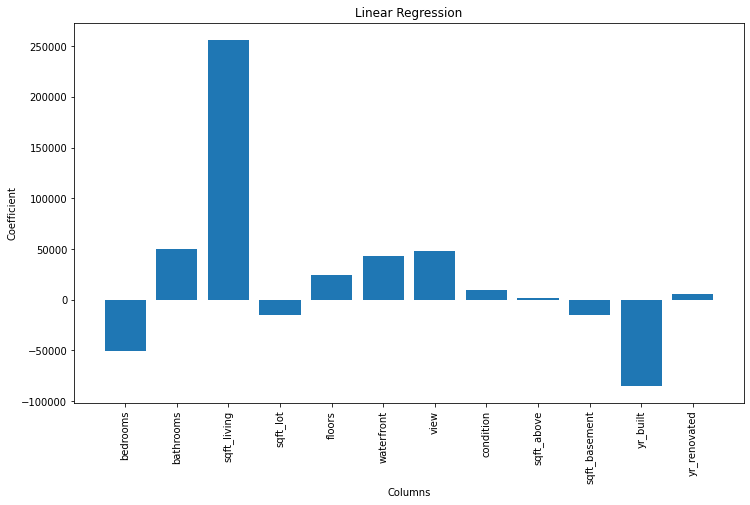

In [37]:
plt.figure(figsize=(12, 7))
plt.bar(x.columns, la.coef_)
plt.xticks(rotation=90, fontsize=10)
plt.title('Linear Regression')
plt.xlabel('Columns')
plt.ylabel('Coefficient')
plt.show()

# Ridge

In [42]:
ri = Ridge(alpha=0.7)
ri.fit(X_train, y_train)
ri.score(X_test, y_test)*100

60.3899368707747

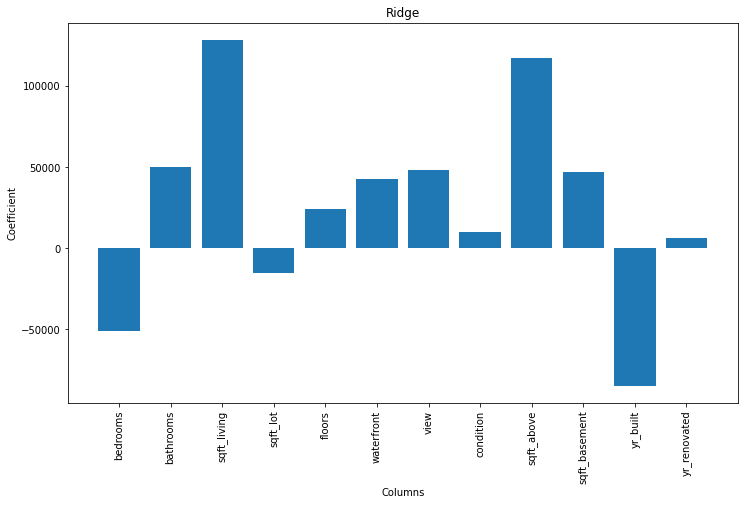

In [43]:
plt.figure(figsize=(12, 7))
plt.bar(x.columns, ri.coef_)
plt.xticks(rotation=90, fontsize=10)
plt.title('Ridge')
plt.xlabel('Columns')
plt.ylabel('Coefficient')
plt.show()

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('')

In [51]:
print(mean_absolute_error(y_test, lr.predict(X_test)))
print(mean_squared_error(y_test, lr.predict(X_test)))
print(np.sqrt(mean_absolute_error(y_test, lr.predict(X_test))))

157938.74882952528
59257306606.50347
397.41508379718715


In [52]:
print(mean_absolute_error(y_test, la.predict(X_test)))
print(mean_squared_error(y_test, la.predict(X_test)))
print(np.sqrt(mean_absolute_error(y_test, la.predict(X_test))))

157854.5935855752
59251607421.65591
397.3091914184408


In [53]:
print(mean_absolute_error(y_test, ri.predict(X_test)))
print(mean_squared_error(y_test, ri.predict(X_test)))
print(np.sqrt(mean_absolute_error(y_test, ri.predict(X_test))))

157853.70527557822
59251752426.206375
397.3080735091828


In [58]:
df = pd.DataFrame({'Columns':x.columns, 'Linear Regression':lr.coef_, 'Lasso':la.coef_, 'Ridge':ri.coef_})

In [59]:
df

,Columns,Linear Regression,Lasso,Ridge
0,bedrooms,-4.983658e+04,-50854.441809,-50846.706139
1,bathrooms,4.984839e+04,49989.803484,49993.076513
2,sqft_living,-2.630071e+17,271187.127456,128290.339940
3,sqft_lot,-1.514482e+04,-15188.769690,-15187.171232
4,floors,2.473007e+04,24344.828660,24343.688300
5,waterfront,4.286442e+04,42796.317866,42795.633518
6,view,4.811569e+04,48208.348471,48209.938333
7,condition,9.962048e+03,9979.694798,9981.585402
8,sqft_above,2.371343e+17,-11443.071336,117381.566634
9,sqft_basement,1.267369e+17,-22250.393262,46601.088260
